In [ ]:
# basic imports
import pandas as pd
import numpy as np


#plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ml models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pickle

In [2]:

df = pd.read_csv(r"C:\Users\wilsen\OneDrive\Desktop\anime\10k_anime_data.csv")
df.sample(5)

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
1467,Captain Tsubasa: Road to 2002,Captain Tsubasa,キャプテン翼 (2001),https://cdn.myanimelist.net/images/anime/5/755...,2001-10-07 00:00:00+00:00,2002-10-06 00:00:00+00:00,Tsubasa Oozora loves everything about soccer: ...,Finished Airing,52.0,PG-13 - Teens 13 or older,2153.0,3034,62148,337,7.46,38566.0,Sports,Team Sports,Shounen
4671,Byeolnala Samchongsa,NaN,별나라 삼총사,https://cdn.myanimelist.net/images/anime/7/616...,NaN,NaN,Three Earth boys aid a space princess to prote...,Finished Airing,1.0,PG - Children,12475.0,16594,598,0,5.47,194.0,"Adventure, Sci-Fi",NaN,NaN
784,Slayers Great,Slayers Great,スレーヤーズぐれえと,https://cdn.myanimelist.net/images/anime/4/130...,1997-08-02 00:00:00+00:00,NaN,"Laia Einburg wants for her father Galia, who i...",Finished Airing,1.0,PG-13 - Teens 13 or older,2871.0,5095,21648,18,7.30,10476.0,"Adventure, Comedy, Fantasy",NaN,NaN
4460,Marie & Gali,NaN,マリー & ガリー,https://cdn.myanimelist.net/images/anime/11/22...,NaN,NaN,Marika is a gothic lolita who somehow ends up ...,Finished Airing,40.0,PG-13 - Teens 13 or older,8008.0,8730,5634,10,6.37,1512.0,Comedy,Educational,NaN
1544,Romeo x Juliet,Romeo x Juliet,ロミオ×ジュリエット,https://cdn.myanimelist.net/images/anime/12/75...,2007-04-05 00:00:00+00:00,2007-09-26 00:00:00+00:00,"On the floating continent of Neo Verona, the M...",Finished Airing,24.0,PG-13 - Teens 13 or older,1723.0,1383,189522,1200,7.57,76663.0,"Drama, Fantasy, Romance",Historical,NaN


In [3]:
df["synopsis"] = df["synopsis"].fillna("none")

In [4]:
len(df)

6003

In [5]:
df[df["title"] == "Sousou no Frieren"]

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics


In [6]:
df.tail(5)

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
5998,Samuraider: Nazo no Tenkousei,NaN,サムライダー 謎の転校生,https://cdn.myanimelist.net/images/anime/1467/...,NaN,NaN,In a combination of samurai movies and Bomber ...,Finished Airing,1.0,R - 17+ (violence & profanity),12451.0,14039,1152,2,5.47,215.0,"Action, Drama",Samurai,NaN
5999,Hyouge Mono,NaN,へうげもの,https://cdn.myanimelist.net/images/anime/3/772...,NaN,NaN,The story is set during Japan's Sengoku Jidai ...,Finished Airing,39.0,R - 17+ (violence & profanity),740.0,4364,30817,329,7.96,5320.0,NaN,"Adult Cast, Historical, Samurai, Visual Arts",Seinen
6000,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,酎ハイれもんLOVE30S 雨にぬれても,https://cdn.myanimelist.net/images/anime/6/277...,NaN,NaN,Bug-eyed Katsumi (known as Chuhai to his frien...,Finished Airing,1.0,R+ - Mild Nudity,11044.0,16699,587,0,5.82,149.0,"Comedy, Drama, Romance",Detective,NaN
6001,One Piece 3D: Mugiwara Chase,One Piece 3D: Straw Hat Chase,ONE PIECE 3D 麦わらチェイス,https://cdn.myanimelist.net/images/anime/4/324...,NaN,NaN,"According to Weekly Shonen Jump, 3D movies of ...",Finished Airing,1.0,PG-13 - Teens 13 or older,4965.0,2897,67470,55,6.89,35815.0,"Action, Adventure, Fantasy",NaN,Shounen
6002,Esper Mami Special: My Angel Mami-chan,NaN,エスパー魔美スペシャル マイエンジェル魔美ちゃん,https://cdn.myanimelist.net/images/anime/2/276...,NaN,NaN,"An end-of-year special, aired between episodes...",Finished Airing,1.0,PG-13 - Teens 13 or older,8838.0,16613,597,0,6.23,145.0,"Comedy, Supernatural",Super Power,NaN


In [7]:
df.duplicated().sum()


0

In [8]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics'],
      dtype='object')

In [9]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,"Crime is timeless. By the year 2071, humanity ...",Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaN,"Another day, another bounty—such is the life o...",Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,"Vash the Stampede is the man with a $$60,000,0...",Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,"Though hidden away from the general public, Wi...",Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,Samuraider: Nazo no Tenkousei,NaN,サムライダー 謎の転校生,https://cdn.myanimelist.net/images/anime/1467/...,NaN,NaN,In a combination of samurai movies and Bomber ...,Finished Airing,1.0,R - 17+ (violence & profanity),12451.0,14039,1152,2,5.47,215.0,"Action, Drama",Samurai,NaN
5999,Hyouge Mono,NaN,へうげもの,https://cdn.myanimelist.net/images/anime/3/772...,NaN,NaN,The story is set during Japan's Sengoku Jidai ...,Finished Airing,39.0,R - 17+ (violence & profanity),740.0,4364,30817,329,7.96,5320.0,NaN,"Adult Cast, Historical, Samurai, Visual Arts",Seinen
6000,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,酎ハイれもんLOVE30S 雨にぬれても,https://cdn.myanimelist.net/images/anime/6/277...,NaN,NaN,Bug-eyed Katsumi (known as Chuhai to his frien...,Finished Airing,1.0,R+ - Mild Nudity,11044.0,16699,587,0,5.82,149.0,"Comedy, Drama, Romance",Detective,NaN
6001,One Piece 3D: Mugiwara Chase,One Piece 3D: Straw Hat Chase,ONE PIECE 3D 麦わらチェイス,https://cdn.myanimelist.net/images/anime/4/324...,NaN,NaN,"According to Weekly Shonen Jump, 3D movies of ...",Finished Airing,1.0,PG-13 - Teens 13 or older,4965.0,2897,67470,55,6.89,35815.0,"Action, Adventure, Fantasy",NaN,Shounen


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6003 non-null   object 
 1   title_english   3543 non-null   object 
 2   title_japanese  6002 non-null   object 
 3   image           6003 non-null   object 
 4   aired_from      2809 non-null   object 
 5   aired_to        1904 non-null   object 
 6   synopsis        6003 non-null   object 
 7   status          6003 non-null   object 
 8   episodes        6003 non-null   float64
 9   rating          5953 non-null   object 
 10  rank            5104 non-null   float64
 11  popularity      6003 non-null   int64  
 12  members         6003 non-null   int64  
 13  favorites       6003 non-null   int64  
 14  score           5885 non-null   float64
 15  scored_by       5885 non-null   float64
 16  genres          5818 non-null   object 
 17  themes          3560 non-null   o

In [11]:
len(df)

6003

In [12]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics'],
      dtype='object')

In [13]:
df.isnull().sum()

title                0
title_english     2460
title_japanese       1
image                0
aired_from        3194
aired_to          4099
synopsis             0
status               0
episodes             0
rating              50
rank               899
popularity           0
members              0
favorites            0
score              118
scored_by          118
genres             185
themes            2443
demographics      4007
dtype: int64

# EDA

In [14]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,"Crime is timeless. By the year 2071, humanity ...",Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaN,"Another day, another bounty—such is the life o...",Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,"Vash the Stampede is the man with a $$60,000,0...",Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,"Though hidden away from the general public, Wi...",Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,Samuraider: Nazo no Tenkousei,NaN,サムライダー 謎の転校生,https://cdn.myanimelist.net/images/anime/1467/...,NaN,NaN,In a combination of samurai movies and Bomber ...,Finished Airing,1.0,R - 17+ (violence & profanity),12451.0,14039,1152,2,5.47,215.0,"Action, Drama",Samurai,NaN
5999,Hyouge Mono,NaN,へうげもの,https://cdn.myanimelist.net/images/anime/3/772...,NaN,NaN,The story is set during Japan's Sengoku Jidai ...,Finished Airing,39.0,R - 17+ (violence & profanity),740.0,4364,30817,329,7.96,5320.0,NaN,"Adult Cast, Historical, Samurai, Visual Arts",Seinen
6000,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,酎ハイれもんLOVE30S 雨にぬれても,https://cdn.myanimelist.net/images/anime/6/277...,NaN,NaN,Bug-eyed Katsumi (known as Chuhai to his frien...,Finished Airing,1.0,R+ - Mild Nudity,11044.0,16699,587,0,5.82,149.0,"Comedy, Drama, Romance",Detective,NaN
6001,One Piece 3D: Mugiwara Chase,One Piece 3D: Straw Hat Chase,ONE PIECE 3D 麦わらチェイス,https://cdn.myanimelist.net/images/anime/4/324...,NaN,NaN,"According to Weekly Shonen Jump, 3D movies of ...",Finished Airing,1.0,PG-13 - Teens 13 or older,4965.0,2897,67470,55,6.89,35815.0,"Action, Adventure, Fantasy",NaN,Shounen


In [15]:
display(df.style.background_gradient)

<bound method Styler.background_gradient of <pandas.io.formats.style.Styler object at 0x0000019D9A01D290>>

In [16]:
len(df)

6003

In [17]:
df_ratings = df.groupby("rating").size()

In [18]:
df_ratings = (df_ratings.reset_index(name="count")).sort_values(by="count")

In [19]:
df_ratings.columns

Index(['rating', 'count'], dtype='object')

In [20]:
px.pie(df_ratings,values="count", names="rating",title="Anime genre")

In [21]:
df_fav_name = df[["title","favorites"]].sort_values(by="favorites",ascending=False)

In [22]:
df_fav_name

,title,favorites
11,One Piece,239752
3960,Fullmetal Alchemist: Brotherhood,234763
5663,Steins;Gate,196685
1393,Death Note,180547
1574,Naruto: Shippuuden,116970
...,...,...
4917,Rose O'Neill Kewpie,0
4920,Black Jack ONA,0
4921,Hoshi ni Negai wo: Cold Body + Warm Heart,0
4922,Suisei,0


C:\Users\wilsen\AppData\Local\Temp\ipykernel_20092\811595062.py:2: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.




Text(0.5, 1.0, 'top 10 anime')

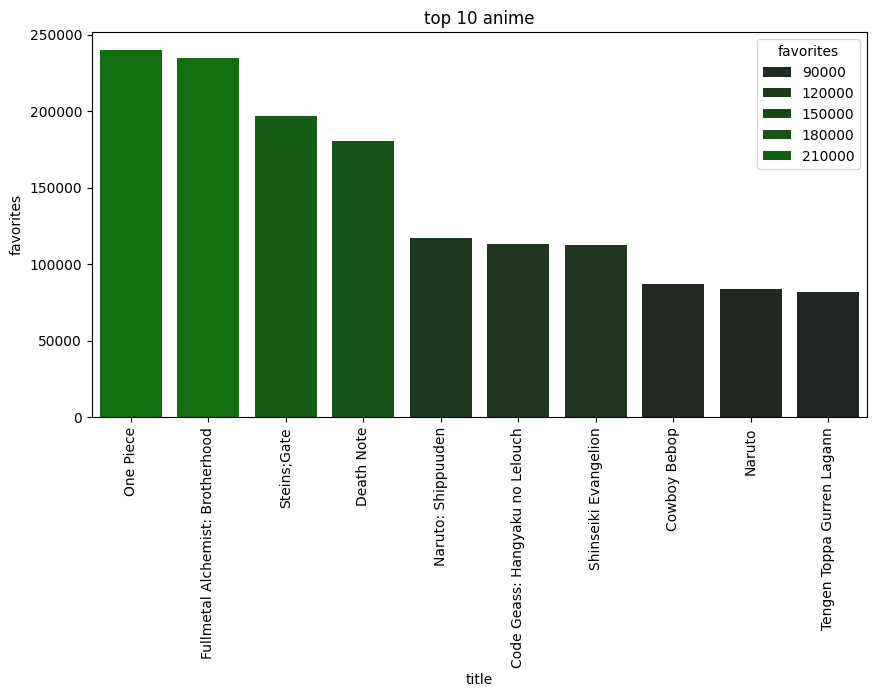

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(df_fav_name[0:10],x="title",y= "favorites",hue="favorites", color="green")
plt.xticks(rotation = 90)
plt.title("top 10 anime")

Text(0.5, 1.0, 'Anime score distribution')

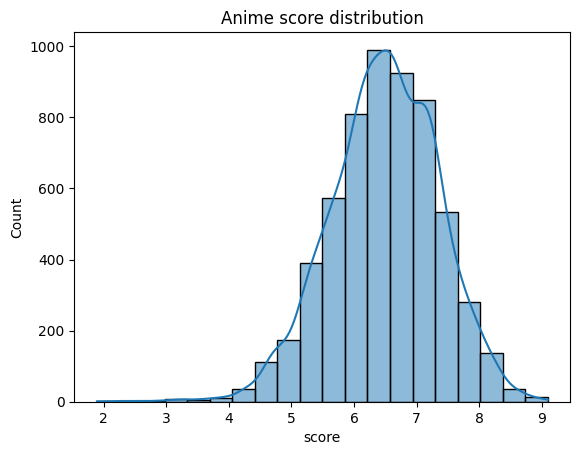

In [24]:
sns.histplot(df["score"],bins=20,kde=True)
plt.title("Anime score distribution")

In [25]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,"Crime is timeless. By the year 2071, humanity ...",Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaN,"Another day, another bounty—such is the life o...",Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,"Vash the Stampede is the man with a $$60,000,0...",Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,"Though hidden away from the general public, Wi...",Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,Samuraider: Nazo no Tenkousei,NaN,サムライダー 謎の転校生,https://cdn.myanimelist.net/images/anime/1467/...,NaN,NaN,In a combination of samurai movies and Bomber ...,Finished Airing,1.0,R - 17+ (violence & profanity),12451.0,14039,1152,2,5.47,215.0,"Action, Drama",Samurai,NaN
5999,Hyouge Mono,NaN,へうげもの,https://cdn.myanimelist.net/images/anime/3/772...,NaN,NaN,The story is set during Japan's Sengoku Jidai ...,Finished Airing,39.0,R - 17+ (violence & profanity),740.0,4364,30817,329,7.96,5320.0,NaN,"Adult Cast, Historical, Samurai, Visual Arts",Seinen
6000,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,酎ハイれもんLOVE30S 雨にぬれても,https://cdn.myanimelist.net/images/anime/6/277...,NaN,NaN,Bug-eyed Katsumi (known as Chuhai to his frien...,Finished Airing,1.0,R+ - Mild Nudity,11044.0,16699,587,0,5.82,149.0,"Comedy, Drama, Romance",Detective,NaN
6001,One Piece 3D: Mugiwara Chase,One Piece 3D: Straw Hat Chase,ONE PIECE 3D 麦わらチェイス,https://cdn.myanimelist.net/images/anime/4/324...,NaN,NaN,"According to Weekly Shonen Jump, 3D movies of ...",Finished Airing,1.0,PG-13 - Teens 13 or older,4965.0,2897,67470,55,6.89,35815.0,"Action, Adventure, Fantasy",NaN,Shounen


In [26]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics'],
      dtype='object')

In [27]:
df_member_count = pd.DataFrame(df.groupby('title')["members"].first())

C:\Users\wilsen\AppData\Local\Temp\ipykernel_20092\1905971993.py:3: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.




Text(0.5, 1.0, 'Top 10 anime based on members')

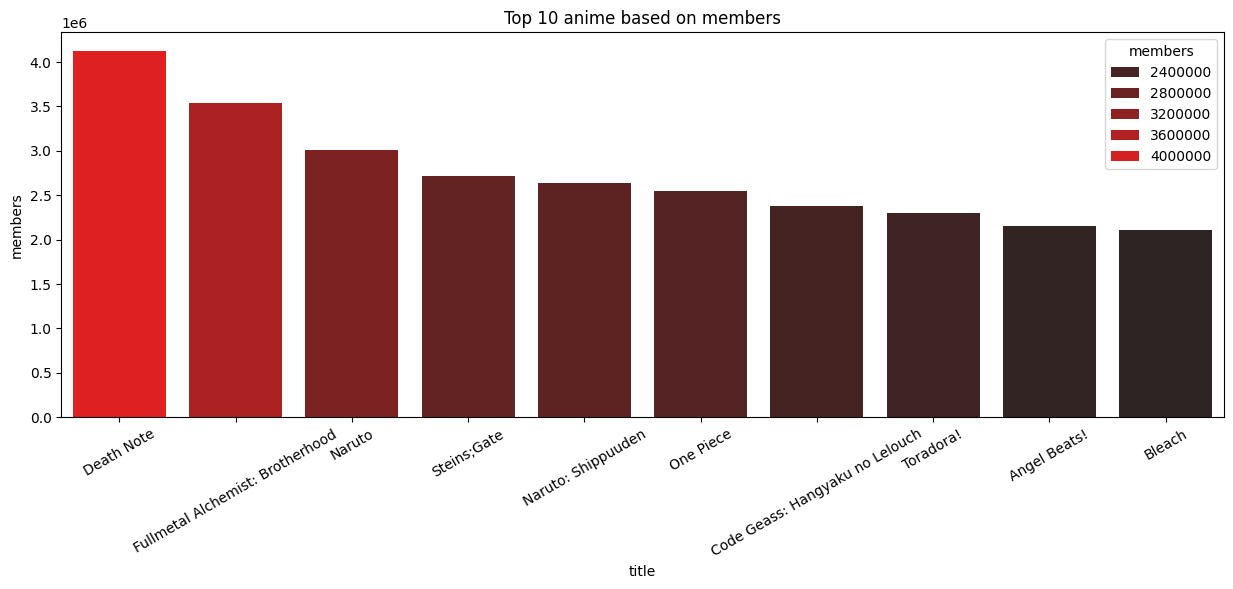

In [28]:
df_member_count.sort_values(by="members",ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(df_member_count.sort_values(by="members",ascending=False)[0:10],x="title",y="members",hue="members",color="red")
plt.xticks(rotation = 30)
plt.title("Top 10 anime based on members")

# word cloud

Text(0.5, 1.0, 'Common genres')

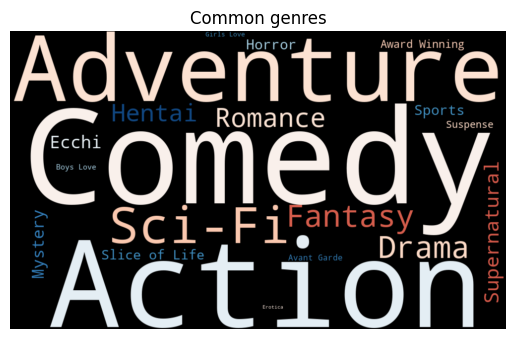

In [29]:
from wordcloud import WordCloud
from collections import defaultdict

world_List = defaultdict(int)

for genre_list in df["genres"]:
    for genre in str(genre_list).split(","):
        world_List[str(genre).strip()] += 1
        
del world_List['nan']

genres_cloud = WordCloud(width=1000, height=600, 
                         background_color='black', colormap='RdBu',max_words=20).generate_from_frequencies(world_List)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common genres")



Text(0.5, 1.0, 'Common themes')

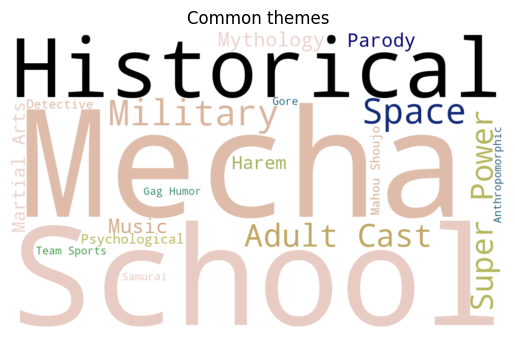

In [30]:
themes_List = defaultdict(int)

for themes_input in df["themes"]:
    for themes in str(themes_input).split(","):
        themes_List[str(themes).strip()] += 1
        
del themes_List['nan']

themes_cloud = WordCloud(width=1000, height=600, background_color='white', colormap='gist_earth_r',max_words=20).generate_from_frequencies(themes_List)
plt.imshow(themes_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common themes")

Text(0.5, 1.0, 'Common demographics')

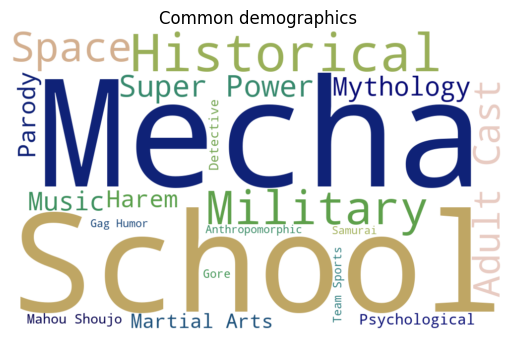

In [31]:
demographics_List = defaultdict(int)

for demographics_input in df["demographics"]:
    for demographics in str(demographics_input).split(","):
        demographics_List[str(demographics).strip()] += 1
        
del demographics_List['nan']

themes_cloud = WordCloud(width=1000, height=600, background_color='white', colormap='gist_earth_r',max_words=20).generate_from_frequencies(themes_List)
plt.imshow(themes_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common demographics")

In [32]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics'],
      dtype='object')

In [33]:
df["synopsis"] = df["synopsis"].replace(to_replace=r"[^a-zA-Z ]",value=" ",regex=True)

In [34]:
splited_data_genres = df["genres"].str.split(",").astype(str)
splited_data_theme = df["themes"].str.split(",").astype(str)
splited_data_demo = df["demographics"].str.split(",").astype(str)

In [35]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wilsen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
df["synopsis"] = df["synopsis"].astype(str)
df["synopsis"] = df.apply(lambda row: word_tokenize(row['synopsis']), axis=1)
df['synopsis'] = [[wnl.lemmatize(word) for word in l] for l in df["synopsis"]]


In [37]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics'],
      dtype='object')

In [38]:
df['synopsis']

0       [Crime, is, timeless, By, the, year, humanity,...
1       [Another, day, another, bounty, such, is, the,...
2       [Vash, the, Stampede, is, the, man, with, a, b...
3       [Though, hidden, away, from, the, general, pub...
4       [It, is, the, dark, century, and, the, people,...
                              ...                        
5998    [In, a, combination, of, samurai, movie, and, ...
5999    [The, story, is, set, during, Japan, s, Sengok...
6000    [Bug, eyed, Katsumi, known, a, Chuhai, to, his...
6001    [According, to, Weekly, Shonen, Jump, D, movie...
6002    [An, end, of, year, special, aired, between, e...
Name: synopsis, Length: 6003, dtype: object

In [39]:
df['synopsis'] = df['synopsis'].astype(str)

In [40]:
df['synopsis'] = df['synopsis'].str.replace(r"[\[\]\\,']", "", regex=True)


In [41]:
df["synopsis"]

0       Crime is timeless By the year humanity ha expa...
1       Another day another bounty such is the life of...
2       Vash the Stampede is the man with a bounty on ...
3       Though hidden away from the general public Wit...
4       It is the dark century and the people are suff...
                              ...                        
5998    In a combination of samurai movie and Bomber B...
5999    The story is set during Japan s Sengoku Jidai ...
6000    Bug eyed Katsumi known a Chuhai to his friend ...
6001    According to Weekly Shonen Jump D movie of One...
6002     An end of year special aired between episode and
Name: synopsis, Length: 6003, dtype: object

In [42]:


# no synosis
cols = ["rating","synopsis","score"]

for i in range(len(df)):
    df["combined"] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1) + splited_data_genres + splited_data_theme + splited_data_demo

vectorizer = TfidfVectorizer(stop_words="english", min_df=3)
matrix = vectorizer.fit_transform(df["combined"])

similarities = cosine_similarity(matrix, matrix)
similarities



array([[1.        , 0.32406188, 0.06390522, ..., 0.00856628, 0.00352748,
        0.01092537],
       [0.32406188, 1.        , 0.09576203, ..., 0.00146694, 0.00717618,
        0.00377723],
       [0.06390522, 0.09576203, 1.        , ..., 0.01325482, 0.03006109,
        0.03792488],
       ...,
       [0.00856628, 0.00146694, 0.01325482, ..., 1.        , 0.00284254,
        0.01511606],
       [0.00352748, 0.00717618, 0.03006109, ..., 0.00284254, 1.        ,
        0.06949342],
       [0.01092537, 0.00377723, 0.03792488, ..., 0.01511606, 0.06949342,
        1.        ]])

In [43]:
vectorizer.get_feature_names_out()

array(['01', '02', '03', ..., 'zoro', 'zorori', 'zwei'], dtype=object)

In [44]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics', 'combined'],
      dtype='object')

In [45]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics,combined
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,Crime is timeless By the year humanity ha expa...,Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN,R - 17+ (violence & profanity) Crime is timele...
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaN,Another day another bounty such is the life of...,Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN,R - 17+ (violence & profanity) Another day ano...
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,Vash the Stampede is the man with a bounty on ...,Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen,PG-13 - Teens 13 or older Vash the Stampede is...
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,Though hidden away from the general public Wit...,Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN,PG-13 - Teens 13 or older Though hidden away f...
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen,PG - Children It is the dark century and the p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,Samuraider: Nazo no Tenkousei,NaN,サムライダー 謎の転校生,https://cdn.myanimelist.net/images/anime/1467/...,NaN,NaN,In a combination of samurai movie and Bomber B...,Finished Airing,1.0,R - 17+ (violence & profanity),12451.0,14039,1152,2,5.47,215.0,"Action, Drama",Samurai,NaN,R - 17+ (violence & profanity) In a combinatio...
5999,Hyouge Mono,NaN,へうげもの,https://cdn.myanimelist.net/images/anime/3/772...,NaN,NaN,The story is set during Japan s Sengoku Jidai ...,Finished Airing,39.0,R - 17+ (violence & profanity),740.0,4364,30817,329,7.96,5320.0,NaN,"Adult Cast, Historical, Samurai, Visual Arts",Seinen,R - 17+ (violence & profanity) The story is se...
6000,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,酎ハイれもんLOVE30S 雨にぬれても,https://cdn.myanimelist.net/images/anime/6/277...,NaN,NaN,Bug eyed Katsumi known a Chuhai to his friend ...,Finished Airing,1.0,R+ - Mild Nudity,11044.0,16699,587,0,5.82,149.0,"Comedy, Drama, Romance",Detective,NaN,R+ - Mild Nudity Bug eyed Katsumi known a Chuh...
6001,One Piece 3D: Mugiwara Chase,One Piece 3D: Straw Hat Chase,ONE PIECE 3D 麦わらチェイス,https://cdn.myanimelist.net/images/anime/4/324...,NaN,NaN,According to Weekly Shonen Jump D movie of One...,Finished Airing,1.0,PG-13 - Teens 13 or older,4965.0,2897,67470,55,6.89,35815.0,"Action, Adventure, Fantasy",NaN,Shounen,PG-13 - Teens 13 or older According to Weekly ...


In [46]:
def get_recommendations(title, n):
    title_idx = df[df['title'] == title].index[0]

    sim_scores = list(enumerate(similarities[title_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]


    target_idx = [i[0] for i in sim_scores]

    results = {
        "Anime Title" : df['title'].iloc[target_idx],
        "similarity" : sim_scores,
        "genres": df["genres"].iloc[target_idx],
        "themes": df["themes"].iloc[target_idx],
        "demographics": df["demographics"].iloc[target_idx]
    }

    top_recommendations = pd.DataFrame(results)
    top_recommendations[["anime_id","sim_score"]] = pd.DataFrame(top_recommendations["similarity"].tolist(),index=top_recommendations.index)
    plt.figure(figsize=(15,5))
    sns.barplot(data=top_recommendations,y="Anime Title",x="sim_score",hue="sim_score",color="green")
    plt.title("recommended anime")
    plt.xticks(rotation = 45)
    

   

    return top_recommendations



In [47]:
df_member_count.sort_values(by="members", ascending=False)

,members
title,
Death Note,4128800
Fullmetal Alchemist: Brotherhood,3541474
Naruto,3006981
Steins;Gate,2712158
Naruto: Shippuuden,2640210
...,...
Zhi Duoduo Zhi Duoduo,315
Da Zuiba Dudu,314
Kaba no Potomasu,297


In [48]:
df

,title,title_english,title_japanese,image,aired_from,aired_to,synopsis,status,episodes,rating,rank,popularity,members,favorites,score,scored_by,genres,themes,demographics,combined
0,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,https://cdn.myanimelist.net/images/anime/4/196...,1998-04-03 00:00:00+00:00,1999-04-24 00:00:00+00:00,Crime is timeless By the year humanity ha expa...,Finished Airing,26.0,R - 17+ (violence & profanity),47.0,42,1981397,86816,8.75,1022817.0,"Action, Award Winning, Sci-Fi","Adult Cast, Space",NaN,R - 17+ (violence & profanity) Crime is timele...
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,https://cdn.myanimelist.net/images/anime/1439/...,2001-09-01 00:00:00+00:00,NaN,Another day another bounty such is the life of...,Finished Airing,1.0,R - 17+ (violence & profanity),216.0,643,398998,1712,8.38,225855.0,"Action, Sci-Fi","Adult Cast, Space",NaN,R - 17+ (violence & profanity) Another day ano...
2,Trigun,Trigun,トライガン,https://cdn.myanimelist.net/images/anime/1130/...,1998-04-01 00:00:00+00:00,1998-09-30 00:00:00+00:00,Vash the Stampede is the man with a bounty on ...,Finished Airing,26.0,PG-13 - Teens 13 or older,385.0,261,805264,16908,8.22,389888.0,"Action, Adventure, Sci-Fi",Adult Cast,Shounen,PG-13 - Teens 13 or older Vash the Stampede is...
3,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),https://cdn.myanimelist.net/images/anime/10/19...,2002-07-03 00:00:00+00:00,2002-12-25 00:00:00+00:00,Though hidden away from the general public Wit...,Finished Airing,26.0,PG-13 - Teens 13 or older,3272.0,1958,123821,674,7.23,45420.0,"Action, Drama, Mystery, Supernatural",Detective,NaN,PG-13 - Teens 13 or older Though hidden away f...
4,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,https://cdn.myanimelist.net/images/anime/7/215...,2004-09-30 00:00:00+00:00,2005-09-29 00:00:00+00:00,It is the dark century and the people are suff...,Finished Airing,52.0,PG - Children,4816.0,5680,16325,16,6.92,6969.0,"Action, Adventure, Fantasy",NaN,Shounen,PG - Children It is the dark century and the p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5998,Samuraider: Nazo no Tenkousei,NaN,サムライダー 謎の転校生,https://cdn.myanimelist.net/images/anime/1467/...,NaN,NaN,In a combination of samurai movie and Bomber B...,Finished Airing,1.0,R - 17+ (violence & profanity),12451.0,14039,1152,2,5.47,215.0,"Action, Drama",Samurai,NaN,R - 17+ (violence & profanity) In a combinatio...
5999,Hyouge Mono,NaN,へうげもの,https://cdn.myanimelist.net/images/anime/3/772...,NaN,NaN,The story is set during Japan s Sengoku Jidai ...,Finished Airing,39.0,R - 17+ (violence & profanity),740.0,4364,30817,329,7.96,5320.0,NaN,"Adult Cast, Historical, Samurai, Visual Arts",Seinen,R - 17+ (violence & profanity) The story is se...
6000,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,酎ハイれもんLOVE30S 雨にぬれても,https://cdn.myanimelist.net/images/anime/6/277...,NaN,NaN,Bug eyed Katsumi known a Chuhai to his friend ...,Finished Airing,1.0,R+ - Mild Nudity,11044.0,16699,587,0,5.82,149.0,"Comedy, Drama, Romance",Detective,NaN,R+ - Mild Nudity Bug eyed Katsumi known a Chuh...
6001,One Piece 3D: Mugiwara Chase,One Piece 3D: Straw Hat Chase,ONE PIECE 3D 麦わらチェイス,https://cdn.myanimelist.net/images/anime/4/324...,NaN,NaN,According to Weekly Shonen Jump D movie of One...,Finished Airing,1.0,PG-13 - Teens 13 or older,4965.0,2897,67470,55,6.89,35815.0,"Action, Adventure, Fantasy",NaN,Shounen,PG-13 - Teens 13 or older According to Weekly ...


C:\Users\wilsen\AppData\Local\Temp\ipykernel_20092\2712266195.py:22: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.




,Anime Title,similarity,genres,themes,demographics,anime_id,sim_score
4439,Jetter Mars,"(4439, 0.24257930064740055)","Action, Drama, Sci-Fi",NaN,NaN,4439,0.242579
2520,Tetsuwan Atom,"(2520, 0.23828879475775835)","Action, Adventure, Drama, Sci-Fi",NaN,Shounen,2520,0.238289
688,Chijoku Shinsatsushitsu,"(688, 0.22938895780269158)",Hentai,NaN,NaN,688,0.229389
4225,Shikkaku Ishi,"(4225, 0.22900312332017667)",Hentai,NaN,NaN,4225,0.229003
4478,Saint Seiya: The Lost Canvas - Meiou Shinwa,"(4478, 0.21059867669983665)","Action, Adventure, Fantasy","Historical, Mythology",Shounen,4478,0.210599
5790,Junod,"(5790, 0.20098920926529756)",Drama,"Historical, Medical",NaN,5790,0.200989
561,Jinzou Ningen Kikaider The Animation,"(561, 0.19357298761716352)","Action, Drama, Sci-Fi",Mecha,Shounen,561,0.193573
3385,Rensa Byoutou,"(3385, 0.1932409731575752)",Hentai,NaN,NaN,3385,0.193241
14,School Rumble,"(14, 0.19237836904188393)","Comedy, Romance","Gag Humor, Love Polygon, School",Shounen,14,0.192378
3884,Tezuka Osamu ga Kieta?! 20-seiki Saigo no Kaij...,"(3884, 0.17782148063056202)",Mystery,NaN,NaN,3884,0.177821


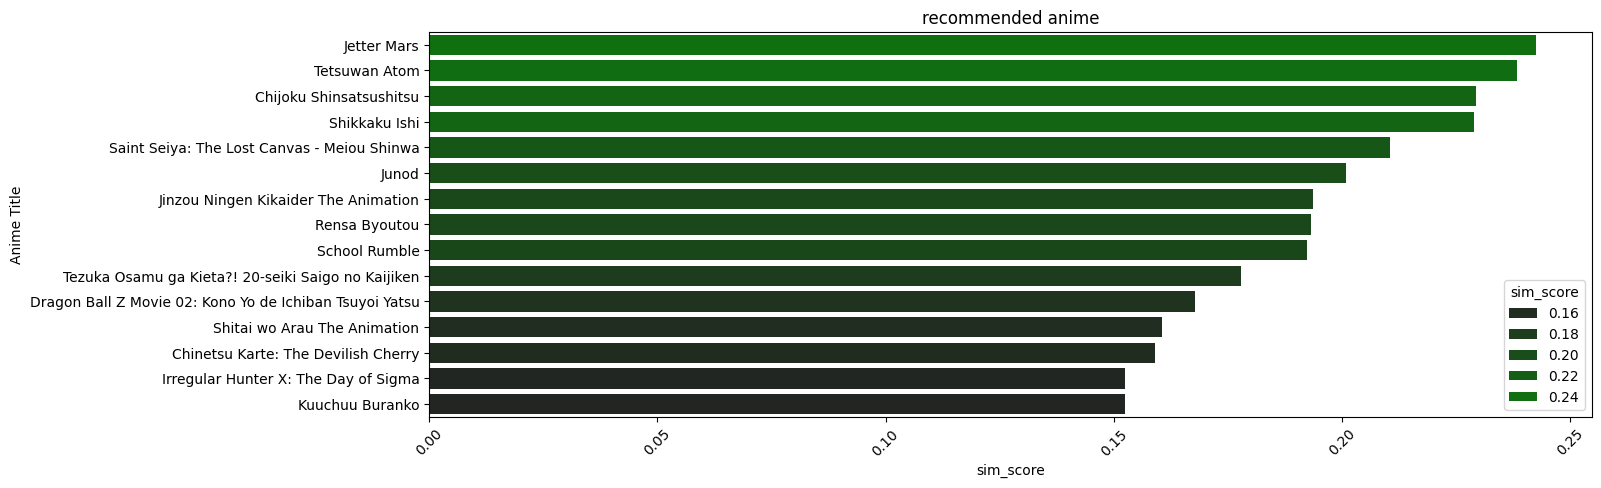

In [51]:
title = "Monster"
n = 15
get_recommendations(title, n)


#top_recommendations["similarities"] = top_recommendations["similarity"].str.replace(r"[\(\)]",regex=True)

In [ ]:
df.columns

Index(['title', 'title_english', 'title_japanese', 'image', 'aired_from',
       'aired_to', 'synopsis', 'status', 'episodes', 'rating', 'rank',
       'popularity', 'members', 'favorites', 'score', 'scored_by', 'genres',
       'themes', 'demographics', 'combined'],
      dtype='object')

In [52]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(matrix, matrix)

In [53]:
def get_recommendations_sigmoid(title, n):
    title_idx = df[df['title'] == title].index[0]

    sim_scores = list(enumerate(sig[title_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]



    target_idx = [i[0] for i in sim_scores]

    results = {
        "Anime Title" : df['title'].iloc[target_idx],
        "similarity" : sim_scores,
    }

    top_recommendations = pd.DataFrame(results)
    
    return top_recommendations

In [54]:
title = "Naruto"
n = 20
get_recommendations_sigmoid(title, n)

,Anime Title,similarity
1574,Naruto: Shippuuden,"(1574, 0.7616106181894673)"
5286,Naruto: Shippuuden Movie 4 - The Lost Tower,"(5286, 0.7616099524627037)"
3505,"Naruto: Shippuuden - Shippuu! ""Konoha Gakuen"" Den","(3505, 0.7616090424622626)"
4540,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"(4540, 0.7616070859067672)"
3628,Naruto: Shippuuden Movie 2 - Kizuna,"(3628, 0.76160641977969)"
557,Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...,"(557, 0.7616053077238235)"
5582,Juliet,"(5582, 0.7616049814269867)"
848,Naruto Movie 2: Dai Gekitotsu! Maboroshi no Ch...,"(848, 0.7616044895199028)"
975,Naruto Narutimate Hero 3: Tsuini Gekitotsu! Jo...,"(975, 0.7616036367460002)"
2267,Naruto: Shippuuden Movie 1,"(2267, 0.7616026156053285)"


In [57]:
with open("similarities.pkl", "wb") as f:
    pickle.dump(similarities, f)